# Analysis of predictions by DNABERT

In [1]:
import pandas as pd

/home/elwazi_mru/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [14]:
df_sequences=pd.read_csv("../DNABERT/examples/dhs/heart_specific_dhs_sequences.tsv", sep="\t")[["dhs_id","sequence"]]
df_sequences

,dhs_id,sequence
0,chr11_121255621_121255836_121255730,CAGGGTGATAAGCATATCAGTGAGTGATGAGCAGGGGTTAGGGCAA...
1,chr12_126348340_126348520_126348430,TTATTTTCTGAGTGGAGAGACCAAATGCATGTGATTTGATGAGCCT...
2,chr1_181043582_181043786_181043690,AGCTACTCAGGAGGCTGAGGTGAGAGGACCACTTAAGCCCAGGAAT...
3,chr2_172561260_172561540_172561390,ATTAAGAGGAAATTAAGGGTTAAAGCAAAGCAGCAGCTGCTATCAG...
4,chr8_20998020_20998280_20998140,AGGCTTTCATGCTTCTCATCTGGTACTTTCCATTTCTCAAGTGGCG...
...,...,...
16165,chr2_214809140_214809517_214809370,CCGGCAGGTGCTAACCGCACGCCGACCCGACTGCAGCGCGGGAACG...
16166,chr2_100821061_100821400_100821210,AGGTCGGTAACCAGGGAAGGGACAGGCACCACCCGGCTAAATTCAG...
16167,chr4_182289289_182289500_182289390,TGAAACATTTGTCCAGTTTAGATAAAGGACTTACTCTATCTACAGC...
16168,chr5_38530105_38530240_38530170,TGTCTATGGAGACAAGGCAGTGCTGGCAGGGGATGGGCCTGGGAGG...


In [15]:
df_kmers=pd.read_csv("../DNABERT/examples/dhs/ft/6/heart_specific_dhs_6mers_with_dhs_ids.tsv", sep="\t").rename(columns={'sequence': 'kmers'})
df_kmers

,dhs_id,kmers,label
0,chr11_121255621_121255836_121255730,CAGGGT AGGGTG GGGTGA GGTGAT GTGATA TGATAA GATA...,1
1,chr12_126348340_126348520_126348430,TTATTT TATTTT ATTTTC TTTTCT TTTCTG TTCTGA TCTG...,1
2,chr1_181043582_181043786_181043690,AGCTAC GCTACT CTACTC TACTCA ACTCAG CTCAGG TCAG...,1
3,chr2_172561260_172561540_172561390,ATTAAG TTAAGA TAAGAG AAGAGG AGAGGA GAGGAA AGGA...,1
4,chr8_20998020_20998280_20998140,AGGCTT GGCTTT GCTTTC CTTTCA TTTCAT TTCATG TCAT...,1
...,...,...,...
16165,chr2_214809140_214809517_214809370,CCGGCA CGGCAG GGCAGG GCAGGT CAGGTG AGGTGC GGTG...,0
16166,chr2_100821061_100821400_100821210,AGGTCG GGTCGG GTCGGT TCGGTA CGGTAA GGTAAC GTAA...,1
16167,chr4_182289289_182289500_182289390,TGAAAC GAAACA AAACAT AACATT ACATTT CATTTG ATTT...,0
16168,chr5_38530105_38530240_38530170,TGTCTA GTCTAT TCTATG CTATGG TATGGA ATGGAG TGGA...,0


In [16]:
import numpy as np

array = np.load("../DNABERT/examples/dhs/result/6/pred_results.npy")
# Convert the numpy array to a pandas DataFrame with a single column named 'Prediction'
df_preds = pd.DataFrame(array, columns=['preds'])
df_preds

#np.savetxt('./dhs/result/6/pred_results.tsv', array, delimiter='\t')


,preds
0,0.001959
1,0.002627
2,0.000050
3,0.056131
4,0.062929
...,...
16165,0.015948
16166,0.003435
16167,0.005390
16168,0.001150


In [17]:
df_preds_final=pd.merge(df_sequences, df_kmers, on="dhs_id")


,dhs_id,sequence,kmers,label
0,chr11_121255621_121255836_121255730,CAGGGTGATAAGCATATCAGTGAGTGATGAGCAGGGGTTAGGGCAA...,CAGGGT AGGGTG GGGTGA GGTGAT GTGATA TGATAA GATA...,1
1,chr12_126348340_126348520_126348430,TTATTTTCTGAGTGGAGAGACCAAATGCATGTGATTTGATGAGCCT...,TTATTT TATTTT ATTTTC TTTTCT TTTCTG TTCTGA TCTG...,1
2,chr1_181043582_181043786_181043690,AGCTACTCAGGAGGCTGAGGTGAGAGGACCACTTAAGCCCAGGAAT...,AGCTAC GCTACT CTACTC TACTCA ACTCAG CTCAGG TCAG...,1
3,chr2_172561260_172561540_172561390,ATTAAGAGGAAATTAAGGGTTAAAGCAAAGCAGCAGCTGCTATCAG...,ATTAAG TTAAGA TAAGAG AAGAGG AGAGGA GAGGAA AGGA...,1
4,chr8_20998020_20998280_20998140,AGGCTTTCATGCTTCTCATCTGGTACTTTCCATTTCTCAAGTGGCG...,AGGCTT GGCTTT GCTTTC CTTTCA TTTCAT TTCATG TCAT...,1
...,...,...,...,...
16165,chr2_214809140_214809517_214809370,CCGGCAGGTGCTAACCGCACGCCGACCCGACTGCAGCGCGGGAACG...,CCGGCA CGGCAG GGCAGG GCAGGT CAGGTG AGGTGC GGTG...,0
16166,chr2_100821061_100821400_100821210,AGGTCGGTAACCAGGGAAGGGACAGGCACCACCCGGCTAAATTCAG...,AGGTCG GGTCGG GTCGGT TCGGTA CGGTAA GGTAAC GTAA...,1
16167,chr4_182289289_182289500_182289390,TGAAACATTTGTCCAGTTTAGATAAAGGACTTACTCTATCTACAGC...,TGAAAC GAAACA AAACAT AACATT ACATTT CATTTG ATTT...,0
16168,chr5_38530105_38530240_38530170,TGTCTATGGAGACAAGGCAGTGCTGGCAGGGGATGGGCCTGGGAGG...,TGTCTA GTCTAT TCTATG CTATGG TATGGA ATGGAG TGGA...,0


In [18]:
df_combined = pd.concat([df_preds_final, df_preds], axis=1)
df_combined

,dhs_id,sequence,kmers,label,preds
0,chr11_121255621_121255836_121255730,CAGGGTGATAAGCATATCAGTGAGTGATGAGCAGGGGTTAGGGCAA...,CAGGGT AGGGTG GGGTGA GGTGAT GTGATA TGATAA GATA...,1,0.001959
1,chr12_126348340_126348520_126348430,TTATTTTCTGAGTGGAGAGACCAAATGCATGTGATTTGATGAGCCT...,TTATTT TATTTT ATTTTC TTTTCT TTTCTG TTCTGA TCTG...,1,0.002627
2,chr1_181043582_181043786_181043690,AGCTACTCAGGAGGCTGAGGTGAGAGGACCACTTAAGCCCAGGAAT...,AGCTAC GCTACT CTACTC TACTCA ACTCAG CTCAGG TCAG...,1,0.000050
3,chr2_172561260_172561540_172561390,ATTAAGAGGAAATTAAGGGTTAAAGCAAAGCAGCAGCTGCTATCAG...,ATTAAG TTAAGA TAAGAG AAGAGG AGAGGA GAGGAA AGGA...,1,0.056131
4,chr8_20998020_20998280_20998140,AGGCTTTCATGCTTCTCATCTGGTACTTTCCATTTCTCAAGTGGCG...,AGGCTT GGCTTT GCTTTC CTTTCA TTTCAT TTCATG TCAT...,1,0.062929
...,...,...,...,...,...
16165,chr2_214809140_214809517_214809370,CCGGCAGGTGCTAACCGCACGCCGACCCGACTGCAGCGCGGGAACG...,CCGGCA CGGCAG GGCAGG GCAGGT CAGGTG AGGTGC GGTG...,0,0.015948
16166,chr2_100821061_100821400_100821210,AGGTCGGTAACCAGGGAAGGGACAGGCACCACCCGGCTAAATTCAG...,AGGTCG GGTCGG GTCGGT TCGGTA CGGTAA GGTAAC GTAA...,1,0.003435
16167,chr4_182289289_182289500_182289390,TGAAACATTTGTCCAGTTTAGATAAAGGACTTACTCTATCTACAGC...,TGAAAC GAAACA AAACAT AACATT ACATTT CATTTG ATTT...,0,0.005390
16168,chr5_38530105_38530240_38530170,TGTCTATGGAGACAAGGCAGTGCTGGCAGGGGATGGGCCTGGGAGG...,TGTCTA GTCTAT TCTATG CTATGG TATGGA ATGGAG TGGA...,0,0.001150


In [19]:
df_combined.columns

Index(['dhs_id', 'sequence', 'kmers', 'label', 'preds'], dtype='object')

# Analysis of results 

## 1. Accuracy and Confusion Matrix

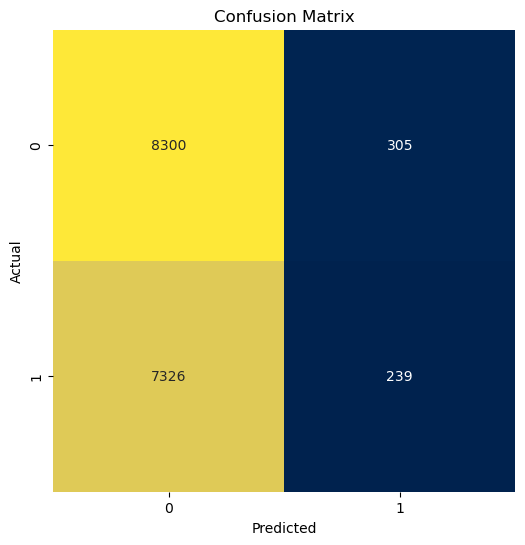

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_combined is your DataFrame with 'label' and 'preds' columns
cm = confusion_matrix(df_combined['label'], df_combined['preds'].round())

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='cividis', cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 2. ROC Curve and AUC for Model Performance

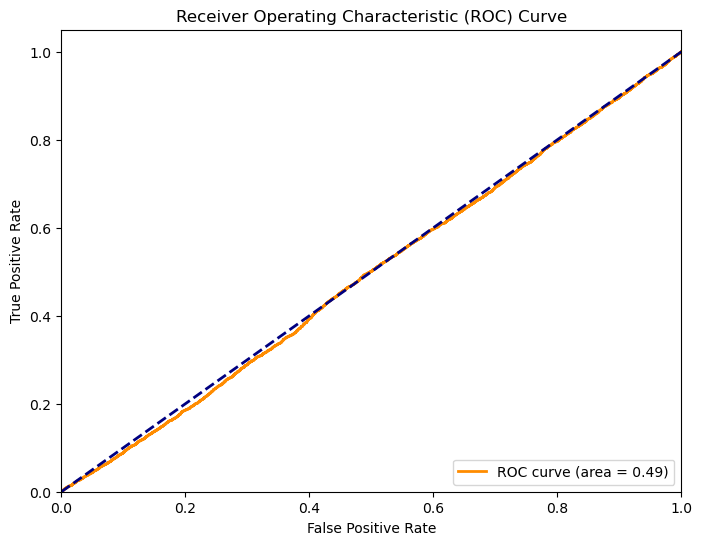

In [22]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(df_combined['label'], df_combined['preds'])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## 3. Analysis of Top Predicted DHSs

In [52]:
# Filter df_combined for entries where preds >= 0.9 and label == 1
top_predicted_dhs = df_combined[(df_combined['preds'] >= 0.9) & (df_combined['label'] == 1)]

print("Top Predicted DHSs with preds >= 0.9 and label == 1:")
print(top_predicted_dhs[['dhs_id', 'label', 'preds']])

Top Predicted DHSs with preds >= 0.9 and label == 1:
                                   dhs_id  label     preds
104       chr1_19057260_19057420_19057336      1  0.976577
111    chr6_167996940_167997140_167997050      1  0.938809
180    chr2_123880920_123881132_123881030      1  0.999687
295      chr14_23380120_23380260_23380230      1  0.999633
522      chr10_85175748_85175920_85175830      1  0.994455
...                                   ...    ...       ...
15714     chr7_75713355_75713540_75713430      1  0.994863
15952     chr7_23116586_23116760_23116670      1  0.999085
15998       chr10_7790600_7790800_7790710      1  0.943728
16026    chr20_59955339_59955514_59955410      1  0.999839
16127  chr4_148341980_148342202_148342080      1  0.996616

[147 rows x 3 columns]


## 4. Visualize the Genomic Distribution of Top Predicted DHSs

/tmp/ipykernel_73231/1220934899.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_predicted_dhs[['Chr', 'start', 'end', 'summit']] = top_predicted_dhs['dhs_id'].str.split('_', expand=True)


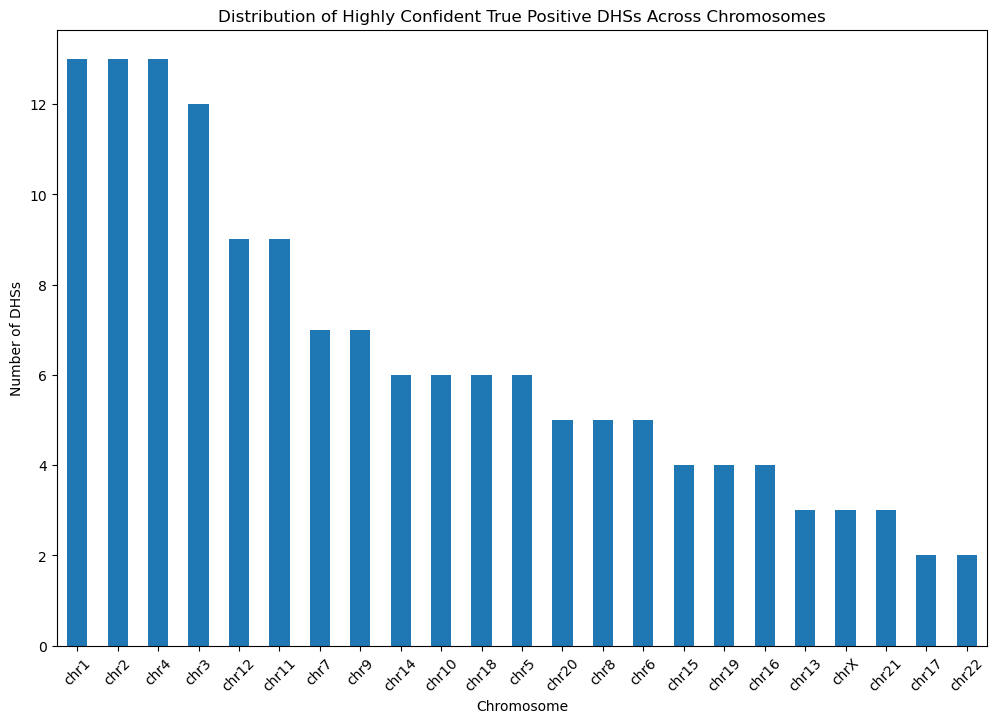

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Split 'dhs_id' into 'Chr', 'start', 'end', 'summit'
top_predicted_dhs[['Chr', 'start', 'end', 'summit']] = top_predicted_dhs['dhs_id'].str.split('_', expand=True)

# Count the number of DHSs per chromosome ('Chr')
dhs_per_chr = top_predicted_dhs['Chr'].value_counts()

plt.figure(figsize=(12, 8))
dhs_per_chr.plot(kind='bar')
plt.title('Distribution of Highly Confident True Positive DHSs Across Chromosomes')
plt.xlabel('Chromosome')
plt.ylabel('Number of DHSs')
plt.xticks(rotation=45)
plt.show()


## 5. Prepare data for Functional Enrichment Analysis

In [62]:
# Remove 'chr' prefix from the 'Chr' column
top_hits=top_predicted_dhs.copy()

In [65]:
top_hits[['Chr', 'start', 'end']].to_csv('../DNABERT/examples/dhs/top_dhs_regions.txt', sep='\t', index=False, header=False)
top_hits[['Chr', 'start', 'end']]

,Chr,start,end
104,chr1,19057260,19057420
111,chr6,167996940,167997140
180,chr2,123880920,123881132
295,chr14,23380120,23380260
522,chr10,85175748,85175920
...,...,...,...
15714,chr7,75713355,75713540
15952,chr7,23116586,23116760
15998,chr10,7790600,7790800
16026,chr20,59955339,59955514


## 6. Submit the top results to the [GREAT Functional Enrichment site](https://great.stanford.edu/great/public/html/)

## 7. Analyse results from GREAT

In [70]:
import pandas as pd

# Replace 'great_output.txt' with the path to your GREAT output file
great_output_df = pd.read_csv('../DNABERT/examples/dhs/greatExportAll.tsv', skiprows=3, sep='\t')  # Adjust separator if needed

# Display the first few rows to verify
print(great_output_df)

                       # Ontology     ID     Desc BinomRank    BinomP  \
0                   Ensembl Genes   1270  SLC39A1         1  0.000232   
1                   Ensembl Genes   2078   ATP5C1         2  0.000763   
2                   Ensembl Genes  11909    TGIF2         3  0.000827   
3                   Ensembl Genes   2608   CALHM3         4  0.000878   
4                   Ensembl Genes   5500    CMTM5         5  0.000886   
...                           ...    ...      ...       ...       ...   
2913      # GO Cellular Component   1667        1      1000       NaN   
2914      # GO Molecular Function   4174        1      1000       NaN   
2915            # Human Phenotype   6643        1      1000       NaN   
2916  # Mouse Phenotype Single KO   9071        1      1000       NaN   
2917            # Mouse Phenotype   9438        1      1000       NaN   

      BinomBonfP  BinomFdrQ  RegionFoldEnrich  ExpRegions  ObsRegions  ...  \
0            1.0        1.0          4308.794

In [75]:
# Define heart-related keywords
heart_keywords = ['heart', 'cardiac', 'cardiovascular', 'atrium', 'ventricle', 'myocardial', 'coronary']

# Filter rows where any of the heart_keywords appear in the 'Desc' column
heart_related_rows = great_output_df[great_output_df['Desc'].str.contains('|'.join(heart_keywords), case=False, na=False)]

# Display heart-related rows
print(heart_related_rows)

                     # Ontology          ID  \
235       GO Biological Process  GO:0007507   
341       GO Biological Process  GO:0061350   
342       GO Biological Process  GO:0061349   
363       GO Biological Process  GO:0061346   
368       GO Biological Process  GO:0003213   
409       GO Biological Process  GO:0086024   
532       GO Biological Process  GO:1901898   
541       GO Biological Process  GO:0003306   
558       GO Biological Process  GO:0003007   
569       GO Biological Process  GO:0003062   
582       GO Biological Process  GO:0001996   
610       GO Biological Process  GO:0086023   
1443            Human Phenotype  HP:0010617   
1450            Human Phenotype  HP:0009729   
1456            Human Phenotype  HP:0100544   
1629            Human Phenotype  HP:0001627   
1700            Human Phenotype  HP:0001707   
1821            Human Phenotype  HP:0030680   
1851            Human Phenotype  HP:0011534   
1857            Human Phenotype  HP:0001654   
2098  Mouse P

In [77]:
heart_related_rows["Desc"].unique()

array(['heart development',
       'planar cell polarity pathway involved in cardiac muscle tissue morphogenesis',
       'planar cell polarity pathway involved in cardiac right atrium morphogenesis',
       'planar cell polarity pathway involved in heart morphogenesis',
       'cardiac right atrium morphogenesis',
       'adrenergic receptor signaling pathway involved in positive regulation of heart rate',
       'negative regulation of relaxation of cardiac muscle',
       'Wnt signaling pathway involved in heart development',
       'heart morphogenesis',
       'regulation of heart rate by chemical signal',
       'positive regulation of heart rate by epinephrine-norepinephrine',
       'adrenergic receptor signaling pathway involved in heart process',
       'Cardiac fibroma', 'Cardiac rhabdomyoma', 'Neoplasm of the heart',
       'Abnormal heart morphology', 'Abnormality of the right ventricle',
       'Abnormality of cardiovascular system morphology',
       'Abnormal spatial or